In [2]:
import numpy as np
import torch
import torchvision

In [3]:
from torch import nn
from torch import optim

In [4]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### 1. Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре).

Внесенные изменения: <br>
1) Добавлена нормализация данных <br>
2) Изменен оптимизатор на Adam <br>
3) Ядро свертки 3х3 вместо изначального 5х5 <br>

In [137]:
transformation = transforms.Compose([
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [138]:
train_dataset = torchvision.datasets.CIFAR10(root='./cifar10',
                                            train=True,
                                            transform=transformation,
                                            download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

Files already downloaded and verified


In [173]:
test_dataset = torchvision.datasets.CIFAR10(root='./cifar10',
                                            train=False,
                                            transform=transformation,
                                            download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=6,
                                         shuffle=False)

Files already downloaded and verified


In [140]:
image, label = train_dataset[0]

In [141]:
image.shape

torch.Size([3, 32, 32])

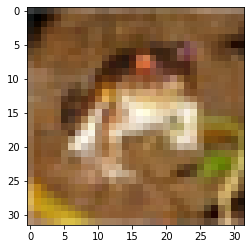

In [142]:
plt.imshow(image.permute(1, 2, 0) / 2 + 0.5)

In [143]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [166]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to('cpu')

In [167]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [168]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.0001)


In [169]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.284
[1,   601] loss: 0.238
[2,     1] loss: 0.001
[2,   301] loss: 0.210
[2,   601] loss: 0.202
[3,     1] loss: 0.001
[3,   301] loss: 0.186
[3,   601] loss: 0.185
[4,     1] loss: 0.001
[4,   301] loss: 0.171
[4,   601] loss: 0.170
[5,     1] loss: 0.001
[5,   301] loss: 0.160
[5,   601] loss: 0.161
[6,     1] loss: 0.000
[6,   301] loss: 0.152
[6,   601] loss: 0.151
[7,     1] loss: 0.000
[7,   301] loss: 0.143
[7,   601] loss: 0.144
[8,     1] loss: 0.000
[8,   301] loss: 0.135
[8,   601] loss: 0.138
[9,     1] loss: 0.000
[9,   301] loss: 0.129
[9,   601] loss: 0.133
[10,     1] loss: 0.000
[10,   301] loss: 0.125
[10,   601] loss: 0.127
[11,     1] loss: 0.000
[11,   301] loss: 0.120
[11,   601] loss: 0.122
[12,     1] loss: 0.000
[12,   301] loss: 0.114
[12,   601] loss: 0.118
[13,     1] loss: 0.000
[13,   301] loss: 0.110
[13,   601] loss: 0.113
[14,     1] loss: 0.000
[14,   301] loss: 0.107
[14,   601] loss: 0.110
[15,     1] loss: 0

In [174]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

class:    cat  ship  ship plane  frog  frog


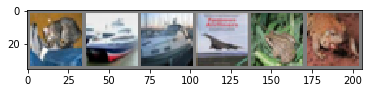

In [176]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy() / 2 +0.5) 
print('class: ', ' '.join('%5s' % classes[labels[j]] for j in range(6)))

In [177]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(6)))

Predicted:    cat  ship  ship plane  frog  frog


### 3. Переписать эту программу на PyTorch: 

![title](img.png)

In [188]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, 0.2)
        x = F.softmax(x)
        return x

In [189]:
net = model()

In [190]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [217]:
mnist_train = torchvision.datasets.MNIST(root='./mnist',
                                  train=True,
                                  transform=transforms.ToTensor(),
                                  download=True)

mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=32,
                                          shuffle=False)

mnist_test = torchvision.datasets.MNIST(root='./mnist',
                                  train=False,
                                  transform=transforms.ToTensor(),
                                  download=True)

mnist_test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=10,
                                          shuffle=False)

In [218]:
for epoch in range(1):
    result_loss = 0.0
    
    for i, data in enumerate(mnist_train_loader, 0):
        inputs, labels = data[0], data[1]
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
#         running_loss += loss.item()
#         if i % 300 == 0:    # печатаем каждые 300 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0

print('Training is finished!')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


Training is finished!


In [219]:
data_iter = iter(mnist_test_loader)
images, labels = data_iter.next()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


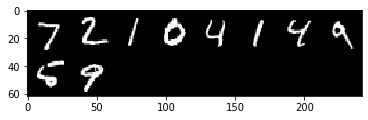

In [220]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy()) 

In [221]:
print('true y: ', ' '.join('%5s' % labels[j].numpy() for j in range(10)))
_, predicted = torch.max(outputs, 1)

print('pred y: ', ' '.join('%5s' % predicted[j].numpy()
                              for j in range(10)))

true y:      7     2     1     0     4     1     4     9     5     9
pred y:      7     2     1     0     4     1     4     9     4     9


#### 2. Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.


* не совсем понял задание, ведь по сути у нас уже выполнены все необходимые шаги: <br>
1) Обнулие градиента <br>
2) предсказание <br>
3) подсчет функции потери <br>
4) подсчет градиента и обратное распространение <br>
5) возврат к пункту 1.

In [225]:
from torch.autograd import Variable

In [237]:
linear = nn.Linear(2, 2)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [238]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

In [263]:
for epoch in range(10):
    optimizer.zero_grad()
    pred = linear(x)
    loss = criterion(pred, y)
    print('loss: ', loss.item())
    loss.backward()
    optimizer.step()

loss:  0.037853773683309555
loss:  0.03689742460846901
loss:  0.0359652005136013
loss:  0.03505654260516167
loss:  0.034170832484960556
loss:  0.033307503908872604
loss:  0.03246600553393364
loss:  0.031645726412534714
loss:  0.03084620274603367
loss:  0.030066857114434242
